In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib, collections
from scipy.stats import norm
import imp, os, pickle
from sklearn.metrics.pairwise import pairwise_distances
import warnings
from matplotlib import collections  as mc
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


## Loading experiments and performance evaluation

In [4]:
random_folder = '../experiments/netflix20k/rand/'
truths = np.zeros((157,))
best_arm = 18960
for flname in os.listdir(random_folder):
    if not flname.endswith('.pkl'):
        continue
    with open(random_folder+flname,'rb') as f:
        x=pickle.load(f)
        truths += [z[0]==best_arm for z in x]    

truths = np.array(truths)/(len(os.listdir(random_folder))+0.0)
mab_folder = '../experiments/netflix20k/meddit/'
mab = []
m = 15000
print len(os.listdir(mab_folder))
for flname in os.listdir(mab_folder):
    try:
        with open(mab_folder+flname,'rb') as f:
            x=pickle.load(f)
            answer = x[0][:np.where(x[0]==0)[0][0]]
            mab += [np.pad(answer==best_arm, (0,m-len(answer)), 'edge')]    
    except:
        print "Wrong exp", flname
        
mab_error = 1-np.array(mab).mean(axis=0)
mab_arm = 32+np.arange(0, mab_error.shape[0])*32*32/20000.0

64


64


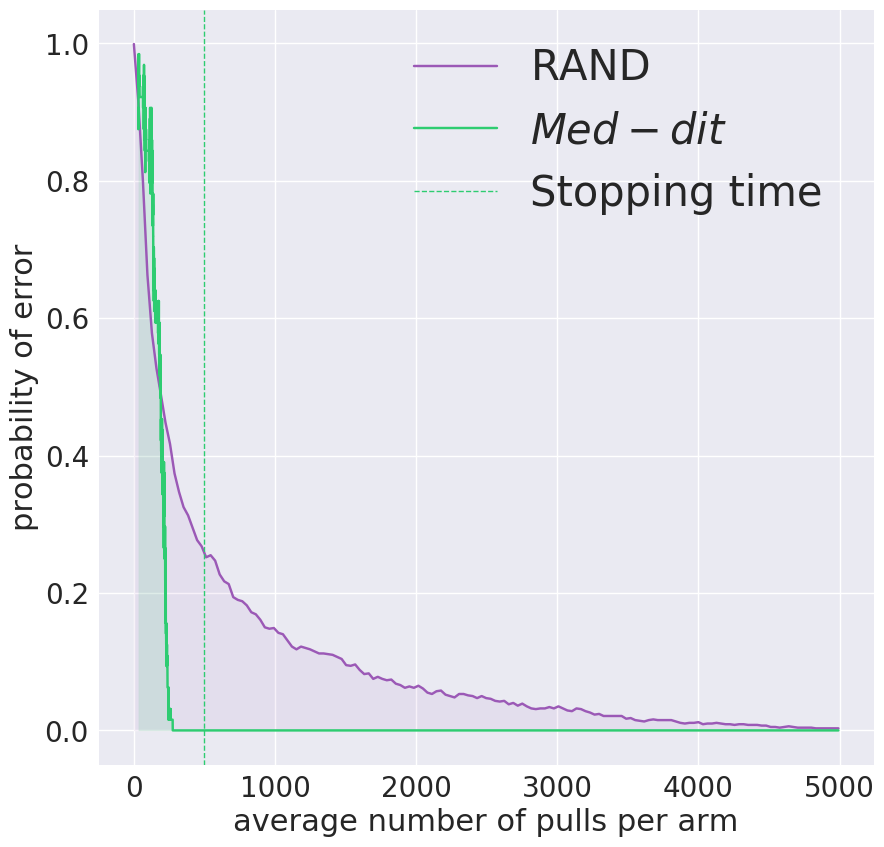

In [5]:
print len(mab)
mab_avg_stopping_time = 500
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
xaxis = np.arange(len(truths))*32
mab_arm[-1] = xaxis[-1]
plt.plot(xaxis, 1-truths, label='RAND', color=colors[0])
plt.fill_between(xaxis, 1-truths,0, color=colors[0], alpha=0.08)
plt.plot(mab_arm, mab_error, label='$Med-dit$',  color=colors[-1])
plt.fill_between(mab_arm, mab_error,0,  color=colors[-1],alpha=0.12)
plt.axvline(mab_avg_stopping_time, linestyle='--', lw=1, color=colors[-1], label="Stopping time ")
plt.legend(prop={'size': 30})
plt.xlabel('average number of pulls per arm')
plt.ylabel('probability of error')
# plt.xlim((30,5000))
# plt.ylim((0,0.7))
plt.show()